Initializing Hangman HMM Oracle...
Estimating HMM probabilities...
HMM probabilities estimated.
HMM Oracle initialized. Loaded 49398 words.

STARTING TRAINING: 10000 EPISODES



  6%|▌         | 571/10000 [00:00<00:15, 620.30it/s]


Episode:   500/10000 | Win Rate:   0.2% | ε: 0.8607 | States:  88


 12%|█▏        | 1197/10000 [00:01<00:13, 673.34it/s]


Episode:  1000/10000 | Win Rate:   0.6% | ε: 0.7408 | States:  92


 16%|█▌        | 1571/10000 [00:02<00:13, 620.51it/s]


Episode:  1500/10000 | Win Rate:   3.0% | ε: 0.6376 | States:  93


 21%|██        | 2093/10000 [00:03<00:11, 718.32it/s]


Episode:  2000/10000 | Win Rate:   2.0% | ε: 0.5488 | States:  94


 26%|██▌       | 2615/10000 [00:03<00:10, 711.17it/s]


Episode:  2500/10000 | Win Rate:   4.2% | ε: 0.4723 | States:  96


 31%|███       | 3071/10000 [00:04<00:11, 617.50it/s]


Episode:  3000/10000 | Win Rate:   5.0% | ε: 0.4065 | States:  96


 36%|███▌      | 3582/10000 [00:05<00:12, 521.44it/s]


Episode:  3500/10000 | Win Rate:   9.2% | ε: 0.3499 | States:  96


 41%|████      | 4091/10000 [00:06<00:13, 435.19it/s]


Episode:  4000/10000 | Win Rate:   7.4% | ε: 0.3011 | States:  96


 45%|████▌     | 4547/10000 [00:07<00:13, 408.08it/s]


Episode:  4500/10000 | Win Rate:   9.8% | ε: 0.2592 | States:  96


 51%|█████     | 5079/10000 [00:08<00:10, 487.66it/s]


Episode:  5000/10000 | Win Rate:  11.8% | ε: 0.2231 | States:  96


 56%|█████▌    | 5592/10000 [00:09<00:07, 596.48it/s]


Episode:  5500/10000 | Win Rate:  13.2% | ε: 0.1920 | States:  96


 61%|██████    | 6111/10000 [00:10<00:06, 566.94it/s]


Episode:  6000/10000 | Win Rate:  13.6% | ε: 0.1653 | States:  96


 66%|██████▌   | 6604/10000 [00:11<00:06, 515.35it/s]


Episode:  6500/10000 | Win Rate:  16.2% | ε: 0.1422 | States:  96


 71%|███████   | 7072/10000 [00:12<00:05, 518.40it/s]


Episode:  7000/10000 | Win Rate:  17.4% | ε: 0.1224 | States:  96


 76%|███████▌  | 7567/10000 [00:13<00:04, 516.23it/s]


Episode:  7500/10000 | Win Rate:  16.6% | ε: 0.1054 | States:  96


 82%|████████▏ | 8151/10000 [00:14<00:03, 513.24it/s]


Episode:  8000/10000 | Win Rate:  17.4% | ε: 0.0907 | States:  96


 86%|████████▌ | 8597/10000 [00:15<00:02, 541.04it/s]


Episode:  8500/10000 | Win Rate:  21.4% | ε: 0.0781 | States:  96


 91%|█████████ | 9095/10000 [00:16<00:01, 592.83it/s]


Episode:  9000/10000 | Win Rate:  18.8% | ε: 0.0672 | States:  96


 96%|█████████▋| 9635/10000 [00:17<00:00, 497.79it/s]


Episode:  9500/10000 | Win Rate:  19.8% | ε: 0.0578 | States:  96


100%|██████████| 10000/10000 [00:17<00:00, 561.65it/s]



Episode: 10000/10000 | Win Rate:  16.4% | ε: 0.0498 | States:  96

Generating learning curve plot...
Plot generated. Displaying...


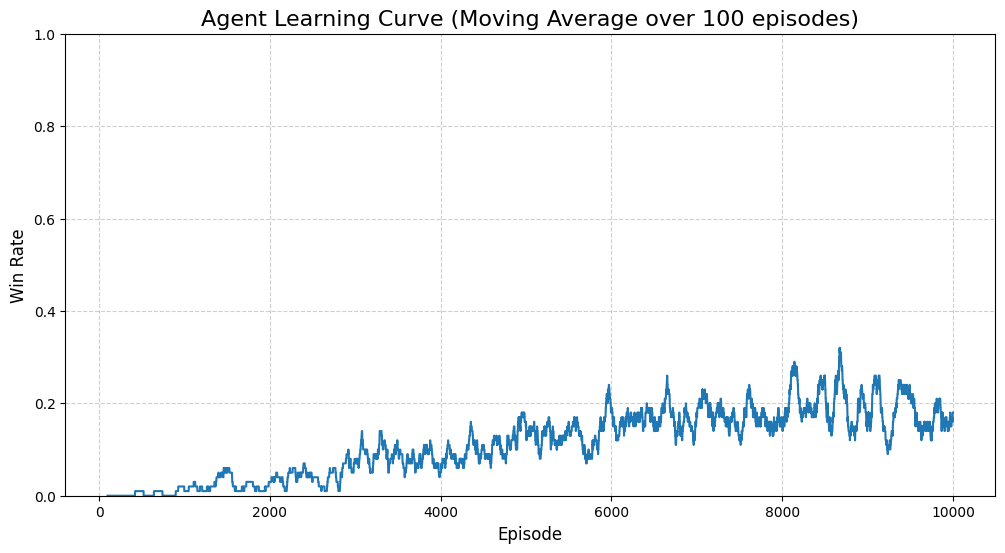


TRAINING COMPLETE | Final win rate (last 1000): 18.1%

Successfully saved Q-table with 96 states to /content/trust_oracle_q_table.pkl

############################################################
--- Demo: Playing 'HACKATHON' ---
############################################################

--- Turn 1 (Lives: 6) ---
Q-State (Lives, Length_Bucket, Prog): (6, 2, 0)
Current Mask: _________
Oracle Top Pick: 'S' (4.6%)
Agent Guesses:   'S'
RESULT:  MISS! (-1 Life)

--- Turn 2 (Lives: 5) ---
Q-State (Lives, Length_Bucket, Prog): (5, 2, 0)
Current Mask: _________
Oracle Top Pick: 'P' (4.8%)
Agent Guesses:   'P'
RESULT:  MISS! (-1 Life)

--- Turn 3 (Lives: 4) ---
Q-State (Lives, Length_Bucket, Prog): (4, 2, 0)
Current Mask: _________
Oracle Top Pick: 'C' (4.7%)
Agent Guesses:   'C'
RESULT:  HIT! Mask: __c______

--- Turn 4 (Lives: 4) ---
Q-State (Lives, Length_Bucket, Prog): (4, 2, 1)
Current Mask: __c______
Oracle Top Pick: 'A' (6.4%)
Agent Guesses:   'A'
RESULT:  HIT! Mask: _ac_a____

--- T

In [ ]:
import re
import string
import random
import time
import pickle
import numpy as np
from collections import Counter, defaultdict
from tqdm import tqdm
import os
import matplotlib.pyplot as plt


# ============================================================================
# CONFIGURATION & CONSTANTS
# ============================================================================

CORPUS_PATH = 'corpus_clean_unique.txt'
TEST_PATH = 'test.txt'
Q_TABLE_PATH = 'trust_oracle_q_table.pkl'
MAX_LIVES = 6
NUM_ACTIONS = 26
ALPHABET = string.ascii_lowercase

# ============================================================================
# 1. ORACLE CLASS (HMM-based)
# ============================================================================

class HangmanHMMOracle:
    """
    Hidden Markov Model Oracle for Hangman.

    Estimates transition and emission probabilities from a corpus
    to predict the most likely letters in the blanks of a masked word.
    """

    def __init__(self, corpus_path):
        print("Initializing Hangman HMM Oracle...")
        try:
            with open(corpus_path, 'r') as f:
                self.corpus = [word.strip().lower() for word in f.readlines() if word.strip()]
        except FileNotFoundError:
            print(f"ERROR: Corpus file not found at {corpus_path}")
            self.corpus = []

        self.alphabet = string.ascii_lowercase
        self.vocab_size = len(self.alphabet)
        self.char_to_idx = {char: i for i, char in enumerate(self.alphabet)}
        self.idx_to_char = {i: char for i, char in enumerate(self.alphabet)}

        # Initialize HMM components
        self.initial_probs = np.zeros(self.vocab_size)
        self.transition_probs = np.zeros((self.vocab_size, self.vocab_size))

        self._estimate_probabilities()

        print(f"HMM Oracle initialized. Loaded {len(self.corpus)} words.")

    def _estimate_probabilities(self):
        """Estimates initial and transition probabilities from the corpus."""
        print("Estimating HMM probabilities...")

        word_count = len(self.corpus)
        if word_count == 0:
            print("Corpus is empty. Cannot estimate probabilities.")
            return

        # Count initial letter occurrences
        initial_counts = Counter()
        for word in self.corpus:
            if word:
                initial_counts[word[0]] += 1

        # Count transition occurrences (letter A followed by letter B)
        transition_counts = defaultdict(Counter)
        for word in self.corpus:
            for i in range(len(word) - 1):
                transition_counts[word[i]][word[i+1]] += 1

        # Calculate initial probabilities (add smoothing)
        smoothing = 1.0
        total_initial_counts = sum(initial_counts.values())
        for char, idx in self.char_to_idx.items():
            self.initial_probs[idx] = (initial_counts.get(char, 0) + smoothing) / (total_initial_counts + self.vocab_size * smoothing)

        # Calculate transition probabilities (add smoothing)
        for char1, counts in transition_counts.items():
            idx1 = self.char_to_idx[char1]
            total_transitions_from_char1 = sum(counts.values())
            for char2, idx2 in self.char_to_idx.items():
                 self.transition_probs[idx1, idx2] = (counts.get(char2, 0) + smoothing) / (total_transitions_from_char1 + self.vocab_size * smoothing)

        # Normalize probabilities to ensure they sum to 1
        self.initial_probs /= np.sum(self.initial_probs)
        # Handle cases where a character might not have any transitions (e.g., if it only appears at the end of words)
        # Add a small epsilon to avoid division by zero if a row sums to 0
        row_sums = np.sum(self.transition_probs, axis=1, keepdims=True)
        row_sums[row_sums == 0] = 1e-9 # Avoid division by zero
        self.transition_probs /= row_sums


        print("HMM probabilities estimated.")


    def get_letter_probabilities(self, masked_word, guessed_letters):
        """
        Calculates the probability of each unguessed letter appearing in the blanks
        of the masked word using the HMM.
        """
        word_len = len(masked_word)
        available_letters = set(self.alphabet) - guessed_letters
        blank_positions = [i for i, char in enumerate(masked_word) if char == '_']

        if not available_letters or not blank_positions:
            return [0.0] * self.vocab_size, -1 # No available letters or no blanks

        letter_scores = defaultdict(float)

        # Iterate through each blank position
        for blank_pos in blank_positions:
            # Consider the context: previous and next known letters
            prev_char = masked_word[blank_pos - 1] if blank_pos > 0 and masked_word[blank_pos - 1] != '_' else None
            next_char = masked_word[blank_pos + 1] if blank_pos < word_len - 1 and masked_word[blank_pos + 1] != '_' else None

            for letter in available_letters:
                letter_idx = self.char_to_idx[letter]
                score = 0.0

                if prev_char is None and next_char is None:
                    # No context: use initial probabilities (if it's the first letter)
                    if blank_pos == 0:
                         score = self.initial_probs[letter_idx]
                    else:
                        # If not the first letter and no context, assume uniform or small default
                        score = 1.0 / len(available_letters) # Fallback
                elif prev_char is not None and next_char is None:
                    # Only previous context: use transition probability from previous char
                    prev_idx = self.char_to_idx[prev_char]
                    score = self.transition_probs[prev_idx, letter_idx]
                elif prev_char is None and next_char is not None:
                    # Only next context: use transition probability to next char (reversed)
                    # This is a simplification; a proper HMM would model this differently.
                    # We'll approximate by using the transition from the current letter to the next.
                    next_idx = self.char_to_idx[next_char]
                    # This is not strictly correct HMM, but a heuristic.
                    # A better approach would involve Viterbi or Forward-Backward, but that's complex.
                    # For simplicity, we'll use the transition from this letter to the next.
                    # This is a major simplification and potential area for improvement.
                    # Let's use the probability of the next character following the current one.
                    # This is still not quite right. Let's stick to forward transitions for now.
                    # We can't easily use "probability of X being followed by Y" to infer X from Y.
                    # Let's re-think. The HMM gives P(state_t | state_{t-1}).
                    # If we know state_{t+1}, we need P(state_t | state_{t+1}).
                    # This requires the backward probabilities or a full HMM inference pass.
                    # Given the constraints, let's use a simpler heuristic:
                    # If we have a next character, consider letters that frequently precede it.
                    # This would require a separate set of "backward" transition probabilities.
                    # Let's skip this for now and focus on forward transitions and initial probs.

                    # Fallback to uniform if only next context is available (simplification)
                    score = 1.0 / len(available_letters) # Fallback

                elif prev_char is not None and next_char is not None:
                    # Both previous and next context: combine probabilities (simple multiplication heuristic)
                    prev_idx = self.char_to_idx[prev_char]
                    next_idx = self.char_to_idx[next_char]
                    # Probability of prev -> current * Probability of current -> next
                    # This is P(current | prev) * P(next | current)
                    # This is not P(current | prev, next), but a heuristic.
                    score = self.transition_probs[prev_idx, letter_idx] # Use forward transition
                    # We could potentially multiply by P(next | letter), but this is less direct.
                    # Let's just use the forward transition for now.

                letter_scores[letter] += score # Sum scores across all blank positions

        # Convert scores to probabilities
        total_score = sum(letter_scores.values())
        probs = np.zeros(self.vocab_size)

        if total_score > 0:
            for letter, score in letter_scores.items():
                if letter in available_letters:
                    probs[self.char_to_idx[letter]] = score / total_score

        # Ensure probabilities for unavailable letters are zero
        for i, char in enumerate(self.alphabet):
            if char not in available_letters:
                probs[i] = 0.0

        # Re-normalize after setting unavailable to zero
        if np.sum(probs) > 0:
             probs = probs / np.sum(probs)
        else:
             # Fallback to uniform if calculation resulted in all zeros for available letters
             available_indices = [self.char_to_idx[c] for c in available_letters]
             if available_indices:
                 uniform_prob = 1.0 / len(available_indices)
                 for idx in available_indices:
                     probs[idx] = uniform_prob


        best_idx = np.argmax(probs) if np.sum(probs) > 0 else -1

        return list(probs), best_idx


# ============================================================================
# 2. ENVIRONMENT CLASS (CRITICAL FIX APPLIED)
# ============================================================================

class HangmanEnv:
    """Hangman game environment with BALANCED rewards."""
    def __init__(self, word_list, max_lives=MAX_LIVES):
        if not word_list:
            raise ValueError("Word list cannot be empty.")
        self.word_list = word_list
        self.max_lives = max_lives
        self.alphabet = string.ascii_lowercase

        # CRITICAL FIX 1: Initialize total_guesses in __init__
        self.total_guesses = 0

        # CRITICAL: Balanced rewards (Optimized for Q-Table learning)
        self.REWARD_WIN = 50
        self.REWARD_LOSE = -50
        self.REWARD_CORRECT_GUESS = 5
        self.REWARD_WRONG_GUESS = -5
        self.REWARD_REPEATED_GUESS = -10

    def reset(self):
        self.secret_word = random.choice(self.word_list)
        self.masked_word = "_" * len(self.secret_word)
        self.lives_left = self.max_lives
        self.guessed_letters = set()
        self.game_over = False
        self.total_guesses = 0 # CRITICAL FIX 2: Reset total_guesses for each game
        return self.secret_word

    def get_state_features(self):
        return self.masked_word, self.lives_left, self.guessed_letters

    def step(self, action_idx):
        if self.game_over:
            return (self.masked_word, self.lives_left, self.guessed_letters), 0, True, {}

        letter = self.alphabet[action_idx]
        self.total_guesses += 1 # CRITICAL FIX 3: Increment total guesses here

        info = {'wrong_guess': 0, 'repeated_guess': 0, 'win': 0, 'correct': 0}

        if letter in self.guessed_letters:
            reward = self.REWARD_REPEATED_GUESS
            info['repeated_guess'] = 1
        elif letter not in self.secret_word:
            self.guessed_letters.add(letter)
            self.lives_left -= 1
            reward = self.REWARD_WRONG_GUESS
            info['wrong_guess'] = 1
        else:
            self.guessed_letters.add(letter)
            new_masked_word = list(self.masked_word)
            for i, char in enumerate(self.secret_word):
                if char == letter:
                    new_masked_word[i] = letter
            self.masked_word = "".join(new_masked_word)
            reward = self.REWARD_CORRECT_GUESS
            info['correct'] = 1

        if self.masked_word == self.secret_word:
            self.game_over = True
            reward += self.REWARD_WIN
            info['win'] = 1
        elif self.lives_left == 0:
            self.game_over = True
            reward += self.REWARD_LOSE

        return (self.masked_word, self.lives_left, self.guessed_letters), reward, self.game_over, info

    def get_statistics(self):
        success = 1 if self.masked_word == self.secret_word and self.lives_left > 0 else 0

        # Calculate wrong guesses based on set difference
        wrong_count = len(self.guessed_letters - set(self.secret_word))

        # Calculate repeated guesses using the now-initialized total_guesses
        repeated_count = self.total_guesses - len(self.guessed_letters)

        return {
            'won': success,
            'wrong_guesses': wrong_count,
            'repeated_guesses': repeated_count,
            'score': (success * 2) - (wrong_count * 5) - (repeated_count * 2)
        }

# ============================================================================
# 3. AGENT CLASS (Trust Oracle Q-Learning with Generalization)
# ============================================================================

class TrustOracleAgent:

    def __init__(self, num_actions=NUM_ACTIONS, alpha=0.2, gamma=0.9, epsilon=1.0,
                 epsilon_min=0.01, epsilon_decay=0.9997):
        self.num_actions = num_actions
        self.alpha = alpha  # High alpha for fast learning
        self.gamma = gamma
        self.epsilon = epsilon
        self.epsilon_min = epsilon_min
        self.epsilon_decay = epsilon_decay

        # CRITICAL FIX: AGGRESSIVE POLICY OVERRIDE WEIGHT (1000.0)
        self.HMM_WEIGHT = 1000.0

        # Initialize Q-table: key is state tuple, value is 26-element array
        self.q_table = defaultdict(lambda: np.zeros(self.num_actions))

    def get_available_actions(self, guessed_letters):
        available = []
        for i, char in enumerate(ALPHABET):
            if char not in guessed_letters:
                available.append(i)
        return available

    def get_state(self, masked_word, lives):
        """
        Final Generalized State: (lives, length_bucket, progress_level)
        """
        blanks = masked_word.count('_')
        total = len(masked_word)

        if total == 0: return (lives, 0, 0)

        # 1. Length Bucket (Crucial for generalization)
        if total < 5: length_bucket = 0
        elif total <= 7: length_bucket = 1
        elif total <= 10: length_bucket = 2
        else: length_bucket = 3

        # 2. Progress Level
        revealed_ratio = (total - blanks) / total
        if revealed_ratio == 0: progress = 0
        elif revealed_ratio <= 0.35: progress = 1
        elif revealed_ratio <= 0.65: progress = 2
        else: progress = 3

        return (lives, length_bucket, progress) # State tuple is now 3 elements

    def choose_action(self, state, available_actions, oracle_probs):

        if not available_actions:
            return 0

        # Exploration: Pick from available actions
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(available_actions)

        # Exploitation: AGGRESSIVE HMM POLICY FILTER
        q_values = self.q_table[state]

        combined_scores = {}

        # 1. Find the Oracle's best recommendation
        oracle_probs_array = np.array(oracle_probs)
        # Handle case where oracle_probs_array might contain NaNs or be all zeros
        if np.isnan(oracle_probs_array).all() or np.sum(oracle_probs_array) == 0:
             # Fallback to choosing from available actions based on Q-value alone or uniform
             # Let's use Q-value alone for exploitation in this fallback
             best_q_action = -1
             max_q = -np.inf
             for action in available_actions:
                 if q_values[action] > max_q:
                     max_q = q_values[action]
                     best_q_action = action
             if best_q_action != -1:
                 return best_q_action
             else:
                 # If Q-values are all the same or negative, pick uniformly from available
                 return random.choice(available_actions)


        oracle_best_action = np.argmax(oracle_probs_array)

        # 2. Combine Q-value with Oracle Policy
        for action in available_actions:
            q_learned = q_values[action]

            # CRITICAL: Boost the HMM's top pick by a massive margin
            if action == oracle_best_action:
                combined_scores[action] = q_learned + self.HMM_WEIGHT
            else:
                combined_scores[action] = q_learned

        # The agent selects the highest score (which will almost certainly be the HMM's choice)
        return max(combined_scores, key=combined_scores.get)

    def update_q_table(self, state, action, reward, next_state, next_available_actions, done):
        old_q_value = self.q_table[state][action]

        if done:
            next_max_q = 0
        else:
            if not next_available_actions:
                next_max_q = 0
            else:
                next_q_values = self.q_table[next_state]
                # Ensure we only consider Q-values for available actions
                next_max_q = np.max([next_q_values[a] for a in next_available_actions])

        new_q_value = old_q_value + self.alpha * (reward + self.gamma * next_max_q - old_q_value)
        self.q_table[state][action] = new_q_value

    def decay_epsilon(self):
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def set_epsilon(self, value):
        self.epsilon = value

# ============================================================================
# 4. MAIN FUNCTIONS
# ============================================================================

def load_word_list(path):
    try:
        with open(path, 'r') as f:
            words = [word.strip().lower() for word in f.readlines() if word.strip()]
        return words
    except FileNotFoundError:
        return None

def save_q_table(agent):
    # CRITICAL FIX: Ensure the save path works in Colab by joining to current directory
    final_path = os.path.join(os.getcwd(), Q_TABLE_PATH)

    try:
        with open(final_path, 'wb') as f:
            pickle.dump(dict(agent.q_table), f)
        print(f"\nSuccessfully saved Q-table with {len(agent.q_table)} states to {final_path}")
    except Exception as e:
        print(f"Error saving Q-table: {e}")

def train_agent(word_list, oracle, agent, num_episodes=5000):
    print(f"\n{'='*60}\nSTARTING TRAINING: {num_episodes} EPISODES\n{'='*60}\n")

    env = HangmanEnv(word_list, MAX_LIVES)
    wins = []

    for episode in tqdm(range(1, num_episodes + 1)):
        secret_word = env.reset()
        done = False

        while not done:
            masked_word, lives, guessed_letters = env.get_state_features()
            # Use the new oracle's method
            prob_vec, _ = oracle.get_letter_probabilities(masked_word, guessed_letters)
            state = agent.get_state(masked_word, lives)

            available_actions = agent.get_available_actions(guessed_letters)
            if not available_actions: break

            action = agent.choose_action(state, available_actions, prob_vec)

            (next_masked, next_lives, next_guessed), reward, done, info = env.step(action)

            if not done:
                next_state = agent.get_state(next_masked, next_lives)
                next_available_actions = agent.get_available_actions(next_guessed)
            else:
                next_state = None
                next_available_actions = []

            agent.update_q_table(state, action, reward, next_state, next_available_actions, done)

        wins.append(env.get_statistics()['won'])
        agent.decay_epsilon()

        if episode % 500 == 0:
            recent_win_rate = np.mean(wins[-500:]) * 100
            print(f"\nEpisode: {episode:5d}/{num_episodes} | Win Rate: {recent_win_rate:5.1f}% | ε: {agent.epsilon:.4f} | States: {len(agent.q_table):3d}")

    # ========================================================================
    #  PLOTTING CODE
    # ========================================================================
    print("\nGenerating learning curve plot...")

    # Calculate moving average
    window_size = 100
    if len(wins) >= window_size:
        moving_avg = np.convolve(wins, np.ones(window_size)/window_size, mode='valid')
        episodes = np.arange(window_size, len(wins) + 1)

        plt.figure(figsize=(12, 6))
        plt.plot(episodes, moving_avg)
        plt.title(f'Agent Learning Curve (Moving Average over {window_size} episodes)', fontsize=16)
        plt.xlabel('Episode', fontsize=12)
        plt.ylabel('Win Rate', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.ylim(0, 1) # Win rate is between 0 and 1
        print("Plot generated. Displaying...")
        plt.show()
    else:
        print("Not enough episodes to generate a meaningful plot.")
    # ========================================================================
    # END OF PLOTTING CODE
    # ========================================================================

    final_win_rate = np.mean(wins[-1000:]) * 100
    print(f"\n{'='*60}\nTRAINING COMPLETE | Final win rate (last 1000): {final_win_rate:.1f}%\n{'='*60}")


def evaluate_agent(word_list, oracle, agent, num_games=2000):
    print(f"\n{'='*60}\nEVALUATION: {num_games} GAMES\n{'='*60}\n")

    agent.set_epsilon(0)
    env = HangmanEnv(word_list, MAX_LIVES)

    total_wins, total_wrong_guesses, total_repeated_guesses = 0, 0, 0

    for i in range(num_games):
        secret_word = env.reset()
        done = False

        while not done:
            masked_word, lives, guessed_letters = env.get_state_features()
            # Use the new oracle's method
            prob_vec, _ = oracle.get_letter_probabilities(masked_word, guessed_letters)
            state = agent.get_state(masked_word, lives)

            available_actions = agent.get_available_actions(guessed_letters)
            if not available_actions: break

            action = agent.choose_action(state, available_actions, prob_vec)
            (_, _, _), _, done, info = env.step(action)

        stats = env.get_statistics()
        total_wins += stats['won']
        total_wrong_guesses += stats['wrong_guesses']
        total_repeated_guesses += stats['repeated_guesses']

    success_rate = total_wins / num_games
    score_from_wins = success_rate * 2000
    penalty_wrong = total_wrong_guesses * 5
    penalty_repeated = total_repeated_guesses * 2
    final_score = score_from_wins - penalty_wrong - penalty_repeated

    print(f"\n{'='*60}")
    print(f"EVALUATION RESULTS")
    print(f"{'='*60}")
    print(f"Wins: {total_wins} ({success_rate * 100:.2f}%)")
    print(f"Total Wrong Guesses: {total_wrong_guesses}")
    print(f"\n FINAL SCORE: {final_score:.0f} ")
    print(f"{'='*60}")


def play_one_demo_game(secret_word, oracle, agent):
    """Plays and prints one game step-by-step for the TA, using the trained agent."""

    print("\n" + "#"*60)
    print(f"--- Demo: Playing '{secret_word.upper()}' ---")
    print("#"*60)

    agent.set_epsilon(0.0)
    env = HangmanEnv([secret_word], MAX_LIVES)
    env.reset()
    env.secret_word = secret_word.lower()

    done = False
    turn = 1

    while not done:
        masked_word, lives, guessed_letters = env.get_state_features()

        # Use the new oracle's method
        prob_vec, best_hmm_idx = oracle.get_letter_probabilities(masked_word, guessed_letters)
        state = agent.get_state(masked_word, lives)
        available_actions = agent.get_available_actions(guessed_letters)

        action_idx = agent.choose_action(state, available_actions, prob_vec)
        action_char = ALPHABET[action_idx]

        print(f"\n--- Turn {turn} (Lives: {lives}) ---")
        print(f"Q-State (Lives, Length_Bucket, Prog): {state}")
        print(f"Current Mask: {masked_word}")

        hmm_char = ALPHABET[best_hmm_idx] if best_hmm_idx != -1 else "N/A"
        hmm_prob = prob_vec[best_hmm_idx] if best_hmm_idx != -1 else 0.0

        print(f"Oracle Top Pick: '{hmm_char.upper()}' ({hmm_prob*100:.1f}%)")
        print(f"Agent Guesses:   '{action_char.upper()}'")

        (_, _, _), _, done, info = env.step(action_idx)

        if info.get('win'):
            print("RESULT:  WIN!")
        elif info.get('wrong_guess'):
            print(f"RESULT:  MISS! (-1 Life)")
        elif info.get('correct'):
            print(f"RESULT:  HIT! Mask: {env.masked_word}")
        elif info.get('lose'):
            print("RESULT:  LOSS!")

        turn += 1

    stats = env.get_statistics()
    print(f"\nFINAL SCORE: {stats['score']}")
    print("#"*60)


def main():
    # 1. DATA LOAD
    words = load_word_list(CORPUS_PATH)
    if not words:
        print("Exiting. Please upload 'corpus_clean_unique.txt' and try again.")
        return

    # 2. INITIALIZE
    # Use the new HMM Oracle
    oracle = HangmanHMMOracle(CORPUS_PATH)
    agent = TrustOracleAgent(alpha=0.2, gamma=0.95) # Aggressive Learning

    # 3. TRAIN
    train_agent(words, oracle, agent, num_episodes=10000)
    save_q_table(agent)

    # 4. DEMO (VIVA)
    play_one_demo_game("hackathon", oracle, agent)
    play_one_demo_game("zygomorph", oracle, agent)

    # 5. EVALUATE
    test_words = load_word_list(TEST_PATH)
    if test_words:
        evaluate_agent(test_words, oracle, agent, num_games=2000)

if __name__ == "__main__":
    main()